In [1]:
## Load the dataset
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\PC-LENOVO\\Desktop\\ExcelR Assginments\\KNN\\glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.shape   #(214, 10)

(214, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
#EDA
#BOXPLOT AND OUTLIERS CALCULATION #
df1 = df.iloc[:,0:10]

In [6]:
from scipy import stats
# Define a threshold for Z-score (e.g., Z-score greater than 3 or less than -3 indicates an outlier)
z_threshold = 3

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
# Calculate the Z-scores for each column in the DataFrame
z_scores = np.abs(stats.zscore(df1))

In [8]:
# Create a mask to identify rows with outliers
outlier_mask = (z_scores > z_threshold).any(axis=1)

In [9]:
# Remove rows with outliers from the DataFrame
df = df[~outlier_mask]

In [10]:
df.shape  #(194, 10))


(194, 10)

In [11]:
# Now, df contains the data with outliers removed

# Data Preprocessing
# Check for missing values (if any)
df.isnull().sum()  #there are no missing values

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [12]:
#continous variables
X = df.iloc[:,0:9]
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0


In [13]:
# Standardization of feature variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
X = scaler.fit_transform(X)
X

array([[ 1.29178128,  0.33212692,  1.23339705, ..., -0.07565285,
        -0.34629211, -0.60305615],
       [-0.19783224,  0.70439768,  0.55158129, ..., -1.00814732,
        -0.34629211, -0.60305615],
       [-0.82434616,  0.16832779,  0.51327703, ..., -1.05882637,
        -0.34629211, -0.60305615],
       ...,
       [-0.53080467,  2.23815319, -2.20632516, ..., -0.43040618,
         4.11744651, -0.60305615],
       [ 1.13405749,  1.4042667 , -2.20632516, ..., -0.38986294,
         4.25781564, -0.60305615],
       [-0.67976602,  1.43404836, -2.20632516, ..., -0.3493197 ,
         4.06129885, -0.60305615]])

In [15]:
Y = df["Type"]
Y

0      1
1      1
2      1
3      1
4      1
      ..
208    7
209    7
210    7
211    7
212    7
Name: Type, Length: 194, dtype: int64

In [22]:
# Label Encoding for the target variable 'type'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [23]:
Y = label_encoder.fit_transform(Y)

In [24]:
#DATA PARTITION
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.75)

In [25]:
#Standardisation 
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()

In [26]:
SS_X = SS.fit_transform(X_train,Y_train)

In [27]:
#MODEL FITTING KNN 
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5,p=2)
KNN.fit(X_train,Y_train)

KNeighborsClassifier()

In [28]:
Y_pred_train = KNN.predict(X_train)
Y_pred_test = KNN.predict(X_test)

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

In [29]:
#METRICS
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#ACCURACY SCORE
ac1 = accuracy_score(Y_train,Y_pred_train)
print("KNN-Training accuracy score:",(ac1).round(3))     #KNN-Training accuracy score: 0.752
ac2 = accuracy_score(Y_test,Y_pred_test)
print("KNN-Test accuracy score:",(ac2).round(3))         #KNN-Test accuracy score: 0.633

KNN-Training accuracy score: 0.752
KNN-Test accuracy score: 0.633


In [30]:
#CONFUSION MATRIX
conf_matrix_1 = confusion_matrix(Y_train, Y_pred_train)
print("Confusion Matrix for training:\n", conf_matrix_1)
conf_matrix_2 = confusion_matrix(Y_test, Y_pred_test)
print("Confusion Matrix for testing:\n", conf_matrix_2)

Confusion Matrix for training:
 [[49  5  0  0  0  0]
 [16 35  0  1  0  0]
 [ 9  1  1  0  0  0]
 [ 0  1  0  4  0  0]
 [ 0  1  0  0  5  0]
 [ 1  1  0  0  0 15]]
Confusion Matrix for testing:
 [[15  1  0  0  0  0]
 [ 8  7  0  1  0  0]
 [ 4  1  0  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  5]]


In [31]:
#CLASSIFICATION REPORT
class_report_1 = classification_report(Y_train, Y_pred_train)
print("Classification Report for training:\n", class_report_1)
class_report_1 = classification_report(Y_test, Y_pred_test)
print("Classification Report for testing:\n", class_report_1)

Classification Report for training:
               precision    recall  f1-score   support

           0       0.65      0.91      0.76        54
           1       0.80      0.67      0.73        52
           2       1.00      0.09      0.17        11
           3       0.80      0.80      0.80         5
           4       1.00      0.83      0.91         6
           5       1.00      0.88      0.94        17

    accuracy                           0.75       145
   macro avg       0.87      0.70      0.72       145
weighted avg       0.79      0.75      0.73       145

Classification Report for testing:
               precision    recall  f1-score   support

           0       0.56      0.94      0.70        16
           1       0.58      0.44      0.50        16
           2       0.00      0.00      0.00         5
           3       0.67      0.50      0.57         4
           4       1.00      1.00      1.00         2
           5       1.00      0.83      0.91         6

    

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
#VALIDTAION APPROACH FOR KNN
l1 = [] 
l2 = []

In [33]:
training_accuracy=[]
test_accuracy=[]

In [34]:
for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.75,random_state=i)
    KNN = KNeighborsClassifier(n_neighbors=15,p=2,) #best k value = 
    KNN.fit(X_train,Y_train)
    Y_pred_train = KNN.predict(X_train)
    Y_pred_test = KNN.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\PC-LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

In [35]:
print("Average Trianing accuracy :",np.mean(training_accuracy).round(3)) #Average Trianing accuracy : 0.682
print("Average Test accuarcy :",np.mean(test_accuracy).round(3))        #Average Test accuarcy : 0.624

Average Trianing accuracy : 0.682
Average Test accuarcy : 0.624


In [36]:
#Average accuracies are getting stored 
l1.append(np.mean(training_accuracy).round(3))
l2.append(np.mean(test_accuracy).round(3))

In [37]:
print(l1)
print(l2)

[0.682]
[0.624]


In [38]:
#subtracting two list by converting into arrays
l1 
l2  


[0.624]

In [39]:
array1= np.array(l1)
array1

array([0.682])

In [40]:
array2= np.array(l2)
array2

array([0.624])

In [41]:
deviation = np.subtract(array1,array2)
deviation

array([0.058])

In [42]:
list(deviation.round(3))

[0.058]

In [43]:
#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

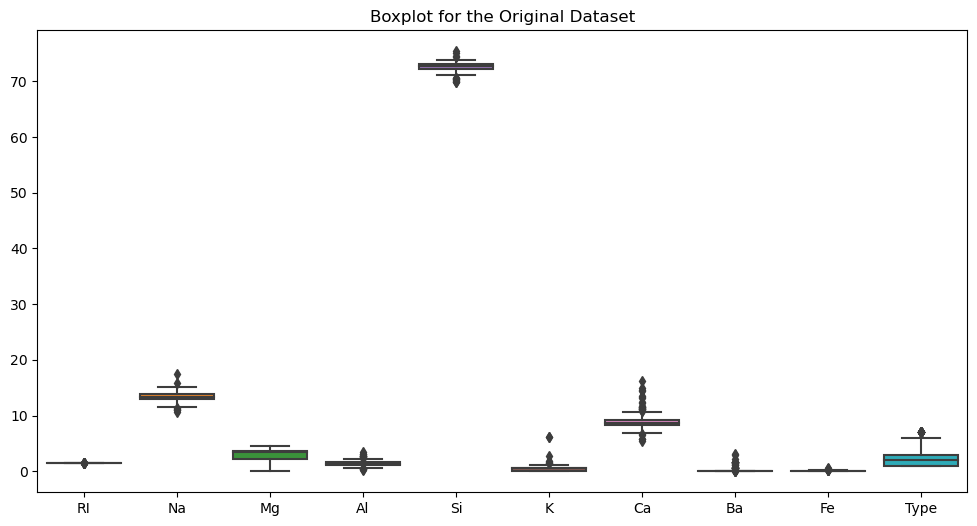

In [44]:
# Boxplot for the original dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1)
plt.title("Boxplot for the Original Dataset")
plt.show()

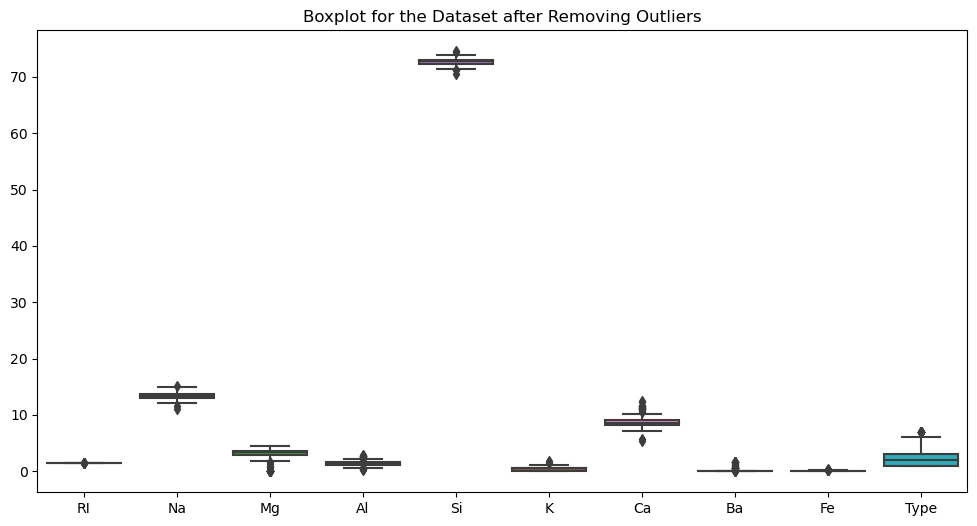

In [45]:
# Boxplot for the dataset after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot for the Dataset after Removing Outliers")
plt.show()

In [46]:
## Count plot for the distribution of the target variable 'Type'
import seaborn as sns
import matplotlib.pyplot as plt

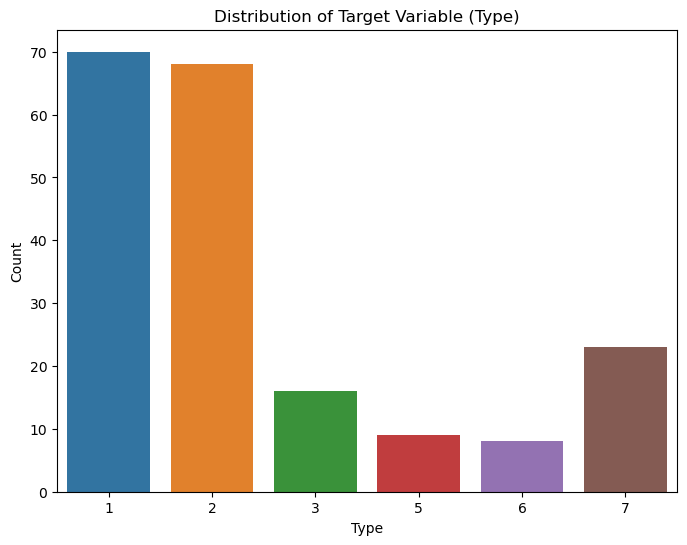

In [49]:
# Count plot for the distribution of the target variable 'Type'
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=df)
plt.title('Distribution of Target Variable (Type)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [48]:
#Visualisation for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

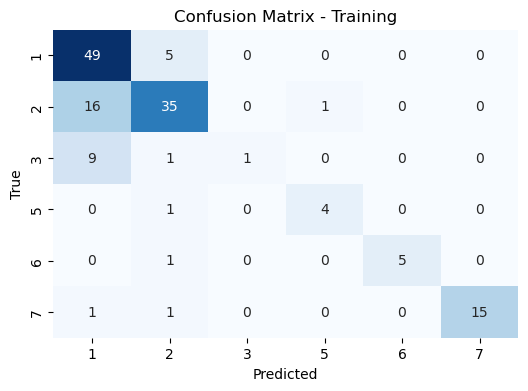

In [51]:
# Plot Confusion Matrix for Training
plot_confusion_matrix(conf_matrix_1, "Confusion Matrix - Training")

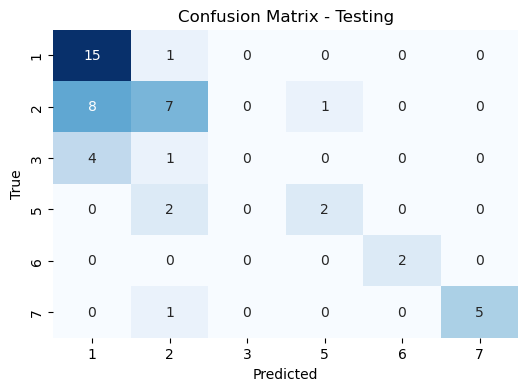

In [52]:
# Plot Confusion Matrix for Testing
plot_confusion_matrix(conf_matrix_2, "Confusion Matrix - Testing")

In [ ]:
# The training accuracy (0.738) is higher than the testing accuracy (0.612), suggesting a potential overfitting of the model to the training data.
# The confusion matrices show how well the model performs in terms of true positives, true negatives, false positives, and false negatives for each class.
# Classes 2 and 3 seem to have poor performance, as indicated by zeros in both precision and recall.
# The classification reports provide a detailed summary of precision, recall, and F1-score for each class